https://en.wikipedia.org/wiki/Imputation_(statistics)

In [1]:
import numpy
print('numpy',numpy.__version__)
import random
import pandas
print('pandas',pandas.__version__)
import matplotlib.pyplot as plt
import scipy.optimize
#import scipy.stats
from scipy import stats
import sklearn.linear_model


numpy 1.13.3
pandas 0.23.4


# straight line

given a dataframe with a column containing a straight line, fill in missing values using extraplation or linear fit

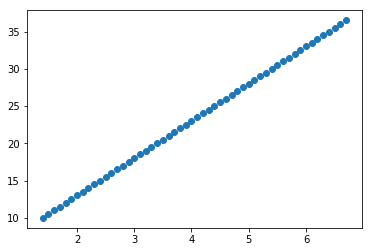

In [2]:
x = numpy.arange(start=1.4, stop=6.8, step=0.1)
y = 5*x+3
_=plt.scatter(x, y)

In [3]:
df_linear = pandas.DataFrame({'x':x,'y':y})
print(df_linear.shape)
df_linear.head()

(54, 2)


,x,y
0,1.4,10.0
1,1.5,10.5
2,1.6,11.0
3,1.7,11.5
4,1.8,12.0


In [4]:
for remov in range(int(len(x)*0.1)):
    row_to_remove_from = random.choice(df_linear.index.values)
#    print(row_to_remove_from)
    df_linear=df_linear.drop([row_to_remove_from],axis=0)

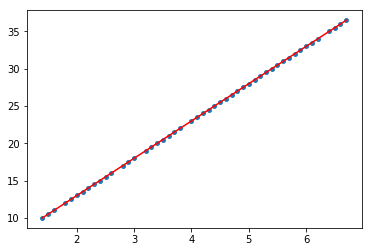

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

_=plt.scatter(df_linear['x'],df_linear['y'],s=15)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_linear['x'].values,df_linear['y'].values)
_=plt.plot(x, intercept + slope*x, 'r', label='fitted line')

In [6]:
# https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy/
fit = numpy.polyfit(df_linear['x'],df_linear['y'],1)

fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

#x=numpy.linspace(min(df_linear['x']),max(df_linear['x']),100)

[4.9999999999999991, 3.0]


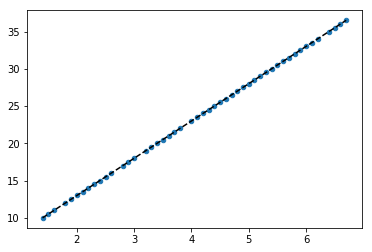

In [7]:
_=plt.scatter(df_linear['x'],df_linear['y'],s=20)

slope, intercept = numpy.polyfit(df_linear['x'].values, df_linear['y'].values, 1) 
print([slope, intercept])
_=plt.plot( df_linear['x'], slope*df_linear['x']+intercept, '--k') 

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

reg = sklearn.linear_model.LinearRegression()

# https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame
# reg.fit(df_linear['x'].values, df_linear['y'].values)

A lag plot is the difference between adjacent values in a series

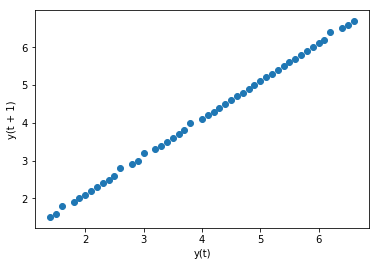

In [9]:
pandas.plotting.lag_plot(df_linear['x']);

# gaussian distribution

Figure out the distribution, then populate values from that distribution

https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html

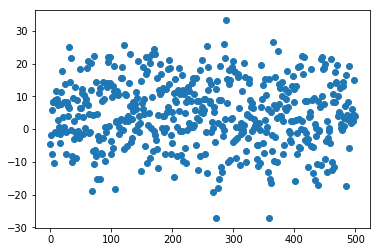

In [10]:
num_points=500

data = numpy.random.normal(0,10,500)
vshift=5
_=plt.scatter(range(len(data)),data+vshift)

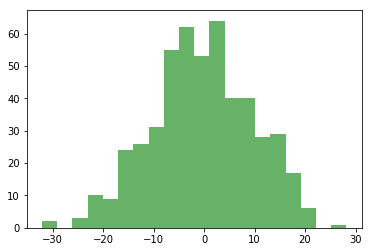

In [11]:
bin_count=20
_=plt.hist(data,bins=bin_count, alpha=0.6, color='g')

https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy

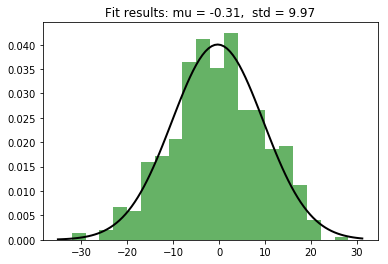

In [12]:

# Fit a normal distribution to the data:
mu, std = scipy.stats.norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=bin_count, density=True, alpha=0.6, color='g')

# Plot the PDF -- https://en.wikipedia.org/wiki/Probability_density_function
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
_=plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
_=plt.title(title)
_=plt.show()

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

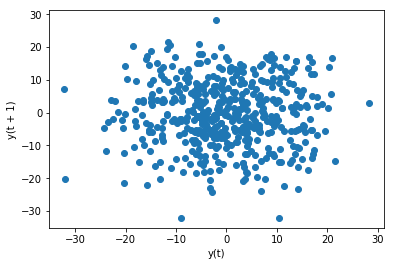

In [13]:
pandas.plotting.lag_plot(pandas.Series(data));

# sine curve

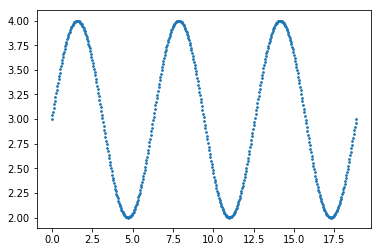

In [14]:
number_of_cycles = 3
number_of_measurements = 500
vshift=3

t = numpy.linspace(0,number_of_cycles*2*numpy.pi,number_of_measurements)

y=numpy.sin(t)+vshift
_=plt.scatter(t,y,s=3)

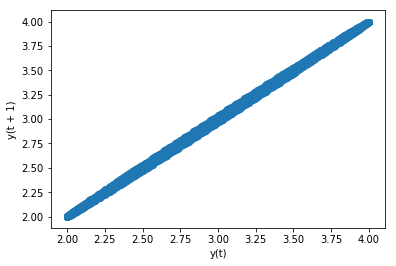

In [15]:
pandas.plotting.lag_plot(pandas.Series(y));

max: 0.4995
[ 0.1195  0.1875  0.193   0.4565  0.0605  0.309   0.219   0.0845  0.125
  0.311 ]


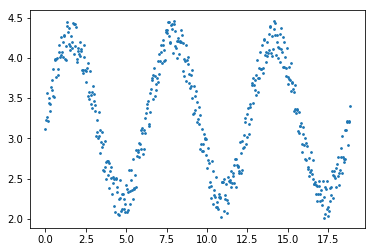

In [16]:
noise = 0.0005*numpy.asarray(random.sample(range(0,1000),number_of_measurements))
print('max:',max(noise))
print(noise[0:10])

_=plt.scatter(t,numpy.sin(t)+vshift+noise,s=3)

max: 3.19042610781
[-1.39451439 -1.12352678 -1.35180773  1.09823452 -1.15537737  1.02431867
 -1.09660271  0.33903385  0.28664212  0.2275977 ]


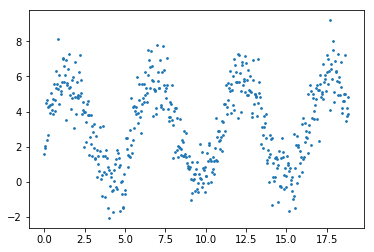

In [17]:
f = 1.15247 # Optional!! Advised not to use
noise = numpy.random.randn(number_of_measurements)
print('max:',max(noise))
print(noise[0:10])
data = 3.0*numpy.sin(f*t+0.001) + vshift + noise # create artificial data with noise

_=plt.scatter(t,data,s=3)

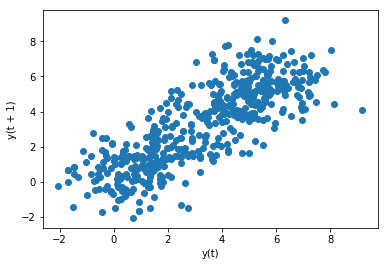

In [18]:
pandas.plotting.lag_plot(pandas.Series(data));

https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy

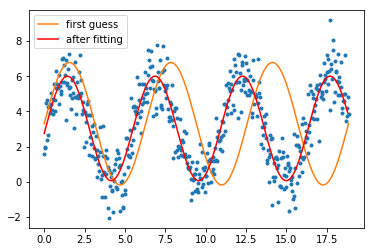

In [19]:
guess_mean = numpy.mean(data)
guess_std = 3*numpy.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*numpy.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*numpy.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = scipy.optimize.leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*numpy.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters
fine_t = numpy.arange(0,max(t),0.1)
data_fit=est_amp*numpy.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, color='r',label='after fitting')
plt.legend()
plt.show()